In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('orders_autumn_2020.csv', parse_dates=["TIMESTAMP"])

In [2]:
df.shape

(18706, 13)

In [3]:
type(df.TIMESTAMP)

pandas.core.series.Series

In [4]:
#df['TEMPERATURE'].describe()

In [5]:
#nan_rows_for_tem = df[df['TEMPERATURE'].isnull()]
#nan_rows_for_tem.tail(10)

In [6]:
df['TEMPERATURE']=df['TEMPERATURE'].fillna(method='ffill')
df['WIND_SPEED']=df['WIND_SPEED'].fillna(method='ffill')
df['CLOUD_COVERAGE']=df['CLOUD_COVERAGE'].fillna(method='ffill')

In [7]:
#nan_rows_for_tem = df[df['WIND_SPEED'].isnull()]
#nan_rows_for_tem.tail(10)

In [8]:
def map_to_binary(value):
    return 1 if value <= 0 else 0
df['DELIVERY_ON_TIME'] = df['ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES'].apply(map_to_binary)
df.head(5)

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,DELIVERY_ON_TIME
0,2020-08-01 06:07:00,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0,1
1,2020-08-01 06:17:00,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0,1
2,2020-08-01 06:54:00,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0,1
3,2020-08-01 07:09:00,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0,1
4,2020-08-01 07:10:00,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0,1


In [9]:
#df['WIND_SPEED'].describe()

In [10]:
df['DATE']=pd.to_datetime(df['TIMESTAMP'])
df['HOUR']=df['DATE'].dt.hour
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday
df['DATE']=df['DATE'].dt.date

print(df.dtypes)

TIMESTAMP                                               datetime64[ns]
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES             int64
ITEM_COUNT                                                       int64
USER_LAT                                                       float64
USER_LONG                                                      float64
VENUE_LAT                                                      float64
VENUE_LONG                                                     float64
ESTIMATED_DELIVERY_MINUTES                                       int64
ACTUAL_DELIVERY_MINUTES                                          int64
CLOUD_COVERAGE                                                 float64
TEMPERATURE                                                    float64
WIND_SPEED                                                     float64
PRECIPITATION                                                  float64
DELIVERY_ON_TIME                                                 int64
DATE  

In [11]:
newdf=df.drop(['ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES','ITEM_COUNT', 'USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG', 'ESTIMATED_DELIVERY_MINUTES', 'ACTUAL_DELIVERY_MINUTES', 'TIMESTAMP'], axis='columns')
newdf['ORDER_COUNT']=1
print(newdf.dtypes)

CLOUD_COVERAGE      float64
TEMPERATURE         float64
WIND_SPEED          float64
PRECIPITATION       float64
DELIVERY_ON_TIME      int64
DATE                 object
HOUR                  int64
DAY_OF_WEEK           int64
ORDER_COUNT           int64
dtype: object


In [12]:
#DailyOrders=newdf.groupby(df['TIMESTAMP'].dt.date)['OrderCount'].sum().reset_index()
#DailyOrders

In [13]:
#MonthlyOrders=newdf.groupby(df['TIMESTAMP'].dt.to_period("M"))['OrderCount'].sum().reset_index()
#MonthlyOrders

In [14]:
#WeeklyOrders=newdf.groupby(df['TIMESTAMP'].dt.to_period("W"))['OrderCount'].sum().reset_index()
#WeeklyOrders

In [15]:
#duplicate_rows=df[df.duplicated()]
#print("duplicate_rows: ", duplicate_rows.shape)

In [16]:
#duplicate_rows.head(10)

In [17]:

# Group by 'Hour' and calculate the average for weather data and the maximum for other columns
result_df = newdf.groupby(['DATE', 'HOUR']).agg({
  'DAY_OF_WEEK': 'max',
    'CLOUD_COVERAGE': 'mean',
    'TEMPERATURE': 'mean',
    'WIND_SPEED': 'mean',
    'DELIVERY_ON_TIME':'max',
    'PRECIPITATION': 'mean',
    'ORDER_COUNT': 'sum'
    # Count the total orders for each hour
}).reset_index()

# Display the resulting DataFrame
result_df.tail(5)


,DATE,HOUR,DAY_OF_WEEK,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,DELIVERY_ON_TIME,PRECIPITATION,ORDER_COUNT
935,2020-09-30,16,2,0.0,13.3,3.18342,1,0.0,42
936,2020-09-30,17,2,0.0,12.8,2.69619,1,0.0,26
937,2020-09-30,18,2,45.0,12.8,2.24368,1,0.0,19
938,2020-09-30,19,2,0.0,12.8,2.34419,1,0.0,8
939,2020-09-30,20,2,0.0,12.8,2.34249,1,0.0,1


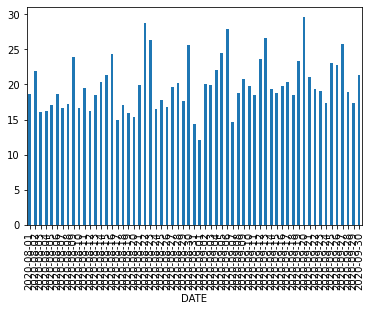

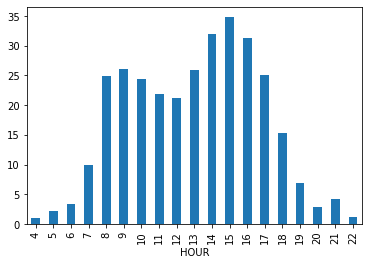

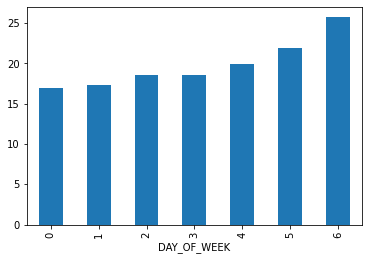

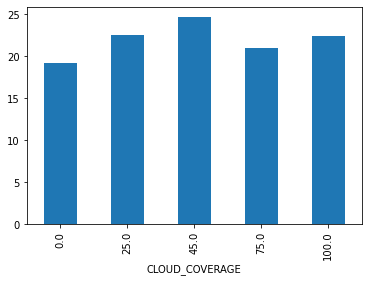

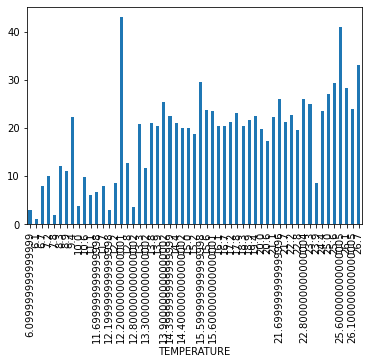

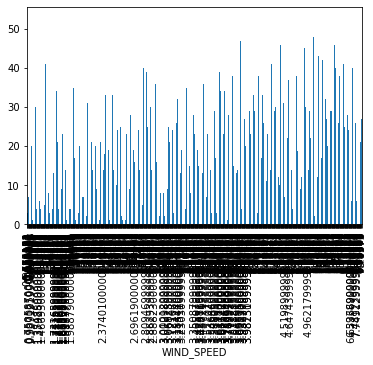

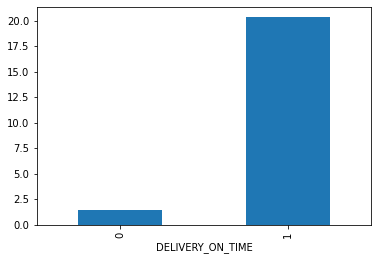

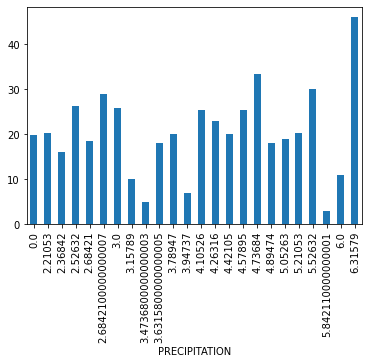

In [18]:
for k in result_df:
    if k != 'ORDER_COUNT':
        result_df.groupby([k])['ORDER_COUNT'].mean().plot.bar()
        plt.show()

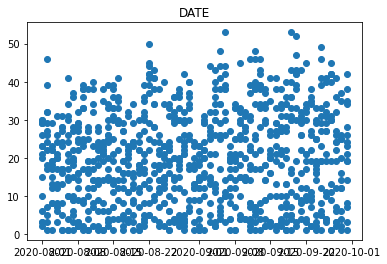

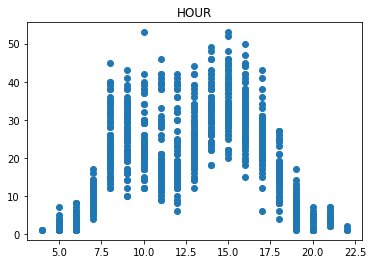

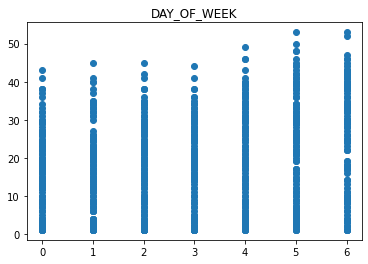

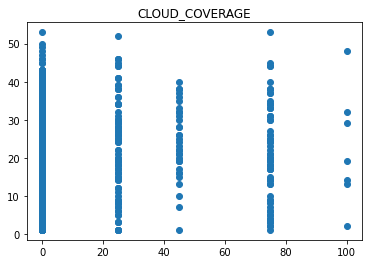

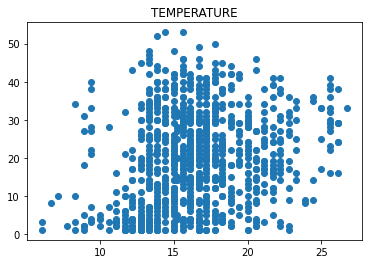

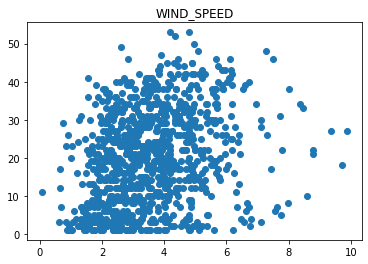

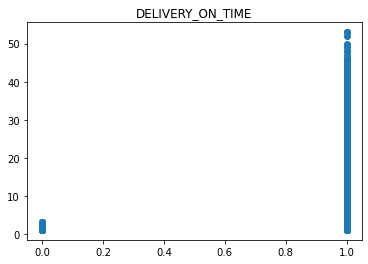

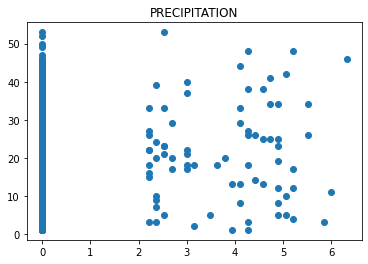

In [19]:
for k in result_df:
    if k != 'ORDER_COUNT':
        plt.scatter(result_df[k],result_df['ORDER_COUNT'])
        plt.title(k)
        plt.show()

In [20]:
value_counts=result_df['DELIVERY_ON_TIME'].value_counts()
print(value_counts)

1    918
0     22
Name: DELIVERY_ON_TIME, dtype: int64


In [21]:
result_df.drop(['DELIVERY_ON_TIME'],axis='columns', inplace=True)


In [22]:
result_df['DATE']=pd.to_datetime(result_df['DATE'])
result_df['DATE']=result_df['DATE'].dt.day
print(result_df.dtypes)

DATE                int64
HOUR                int64
DAY_OF_WEEK         int64
CLOUD_COVERAGE    float64
TEMPERATURE       float64
WIND_SPEED        float64
PRECIPITATION     float64
ORDER_COUNT         int64
dtype: object


In [23]:
#print(newdf.iloc[range(251,300)])

In [24]:
#newdf['DATE'] = newdf['DATE'].astype('datetime64[ns]')
# Convert other columns if necessary

X = result_df.drop('ORDER_COUNT', axis='columns')
y = result_df['ORDER_COUNT']

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

#  number of splits for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = -cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Display the mean squared error scores

print("Mean Squared Error Mean:", mse_scores.mean())


Mean Squared Error Mean: 30.021708829787237


In [26]:

regressor.fit(X, y)

RandomForestRegressor()

In [27]:
feature_importances = regressor.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.04491621 0.74210987 0.09301674 0.01255235 0.03865747 0.06392206
 0.0048253 ]


In [28]:

upcoming_order=pd.DataFrame({'DATE':['2021-09-30'], 'HOUR':[18], 'DAY_OF_WEEK': [2], 'CLOUD_COVERAGE': [0], 'TEMPERATURE': [5], 'WIND_SPEED' :[3], 'PRECIPITATION': [0]})

upcoming_order['DATE']=pd.to_datetime(upcoming_order['DATE'])
upcoming_order['DATE']=upcoming_order['DATE'].dt.day


print(upcoming_order.dtypes)
# Make predictions
predictions = regressor.predict(upcoming_order)

# Display predictions
print("Predictions for the upcoming day/week:")
print(predictions)


DATE              int64
HOUR              int64
DAY_OF_WEEK       int64
CLOUD_COVERAGE    int64
TEMPERATURE       int64
WIND_SPEED        int64
PRECIPITATION     int64
dtype: object
Predictions for the upcoming day/week:
[14.92]
